In [1]:
import numpy as np
from scipy.linalg import circulant
from matplotlib import pyplot as plt
from matplotlib import animation


#inital condition

x0 = 0.3


x = np.linspace(0,1,num=100)
fil = np.zeros([100,1])

def inital_slopes(x0):
    point_1 = np.array([0,0])
    point_2 = np.array([x0,1])
    point_3 = np.array([1,0])
    
    slope_1 = (point_2 - point_1) 
    slope_1 = slope_1[1]/slope_1[0] 
    
    slope_2 = (point_3 - point_2)
    slope_2 = slope_2[1]/slope_2[0] 
    
    return slope_1, slope_2

def inital_conditions(x,fil,x0, inital_slopes_func):
    slope_1,slope_2 = inital_slopes(x0)
    for i in range(len(x)):
        if x[i] <= x0:
            fil[i] = slope_1 * x[i] 
        elif x[i] > x0: 
            fil[i] = slope_2 * x[i] - slope_2 
    return fil,slope_1,slope_2
    


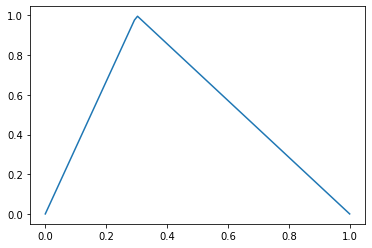

In [2]:
import matplotlib.pyplot as plt
fil, s1,s2 = inital_conditions(x,fil,x0, inital_slopes)

plt.plot(x,fil)


In [3]:
def coefficent(k,x0,s1,s2):
    numerator = np.sqrt(2) * (k * np.pi *(s2 * (-1+x0)-s1*x0)*np.cos(k*np.pi*x0)+s2*np.sin(k*np.pi) + (s1-s2)*np.sin(k*np.pi*x0))
    denominator = k**2 * np.pi**2
    return numerator/denominator

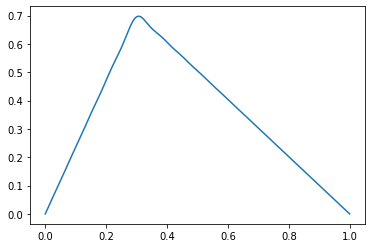

In [4]:
import sympy as sp
x = sp.Symbol('x')
t = sp.Symbol('t')

function_1 = 0 
for i in range(1,30):
    a_k = coefficent(i,x0,s1,s2)
    function_1  = function_1 + a_k * sp.sin(np.pi*i*x) * sp.cos(np.pi*i*t)
f = sp.lambdify(x, function_1)
f_x_t = sp.lambdify([x,t], function_1)    

x = np.linspace(0,1,num=1000)  
plt.plot(x,f_x_t(x,0))


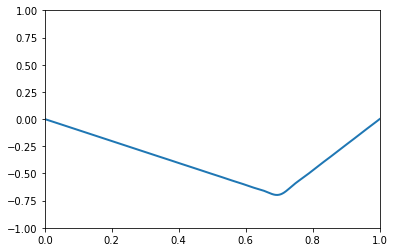

In [5]:
"""
Matplotlib Animation Example
author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-1, 1))
line, = ax.plot([], [], lw=2)
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 1, 1000)
    y = f_x_t(x,i)
    line.set_data(x, y)
    return line,
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
frames=np.linspace(0,5,100), interval=100, blit=True)
# save the animation as an mp4. This requires ffmpeg or mencoder to be
# installed. The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5. You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()
from IPython.display import HTML
HTML(anim.to_html5_video())